PROTEIN PROPERTY ANALYZER WITH VISUALIZATION 

In [1]:
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import MeltingTemp as mt


In [2]:
# Load protein sequence from FASTA
record = SeqIO.read("hemo.fasta", "fasta")
sequence = str(record.seq)

# Analyze the sequence
analyzed_seq = ProteinAnalysis(sequence)

In [3]:
# Output results
print(f"Protein Sequence: {sequence[:30]}... [{len(sequence)} aa]\n")

print("Protein Properties:")
print(f"- Molecular Weight: {analyzed_seq.molecular_weight():.2f} Da")
print(f"- Isoelectric Point (pI): {analyzed_seq.isoelectric_point():.2f}")
print(f"- Aromaticity: {analyzed_seq.aromaticity():.4f}")
print(f"- Instability Index: {analyzed_seq.instability_index():.2f}")
print(f"- GRAVY: {analyzed_seq.gravy():.2f}")

print("\nAmino Acid Composition:")
for aa, perc in analyzed_seq.get_amino_acids_percent().items():
    print(f"  {aa}: {perc:.2%}")

with open("hemo_analysis.txt", "w") as f:
    f.write(f"Protein Sequence: {sequence[:30]}... [{len(sequence)} aa]\n\n")
    f.write("Protein Properties:\n")
    f.write(f"- Molecular Weight: {analyzed_seq.molecular_weight():.2f} Da\n")
    f.write(f"- Isoelectric Point (pI): {analyzed_seq.isoelectric_point():.2f}\n")
    f.write(f"- Aromaticity: {analyzed_seq.aromaticity():.4f}\n")
    f.write(f"- Instability Index: {analyzed_seq.instability_index():.2f}\n")
    f.write(f"- GRAVY: {analyzed_seq.gravy():.2f}\n\n")
    f.write("Amino Acid Composition:\n")
    for aa, perc in analyzed_seq.get_amino_acids_percent().items():
        f.write(f"  {aa}: {perc:.2%}\n")
# Save the analysis results to a text file
# The analysis results are saved to "hemo_analysis.txt"
# The script reads a protein sequence from a FASTA file, analyzes it, and outputs the results to the console and a text file.
# The script uses Biopython's SeqIO and ProteinAnalysis modules to perform the analysis.


Protein Sequence: MVLSPADKTNVKAAWGKVGAHAGEYGAEAL... [142 aa]

Protein Properties:
- Molecular Weight: 15257.36 Da
- Isoelectric Point (pI): 8.72
- Aromaticity: 0.0775
- Instability Index: 6.97
- GRAVY: 0.05

Amino Acid Composition:
  A: 14.79%
  C: 0.70%
  D: 5.63%
  E: 2.82%
  F: 4.93%
  G: 4.93%
  H: 7.04%
  I: 0.00%
  K: 7.75%
  L: 12.68%
  M: 2.11%
  N: 2.82%
  P: 4.93%
  Q: 0.70%
  R: 2.11%
  S: 7.75%
  T: 6.34%
  V: 9.15%
  W: 0.70%
  Y: 2.11%


c:\Users\gurur\OneDrive\Documents\PROJECTS\armada-env\Lib\site-packages\Bio\SeqUtils\ProtParam.py:106: BiopythonDeprecationWarning: The get_amino_acids_percent method has been deprecated and will likely be removed from Biopython in the near future. Please use the amino_acids_percent attribute instead.
  warnings.warn(


In [5]:
import matplotlib.pyplot as plt


c:\Users\gurur\OneDrive\Documents\PROJECTS\armada-env\Lib\site-packages\Bio\SeqUtils\ProtParam.py:106: BiopythonDeprecationWarning: The get_amino_acids_percent method has been deprecated and will likely be removed from Biopython in the near future. Please use the amino_acids_percent attribute instead.
  warnings.warn(


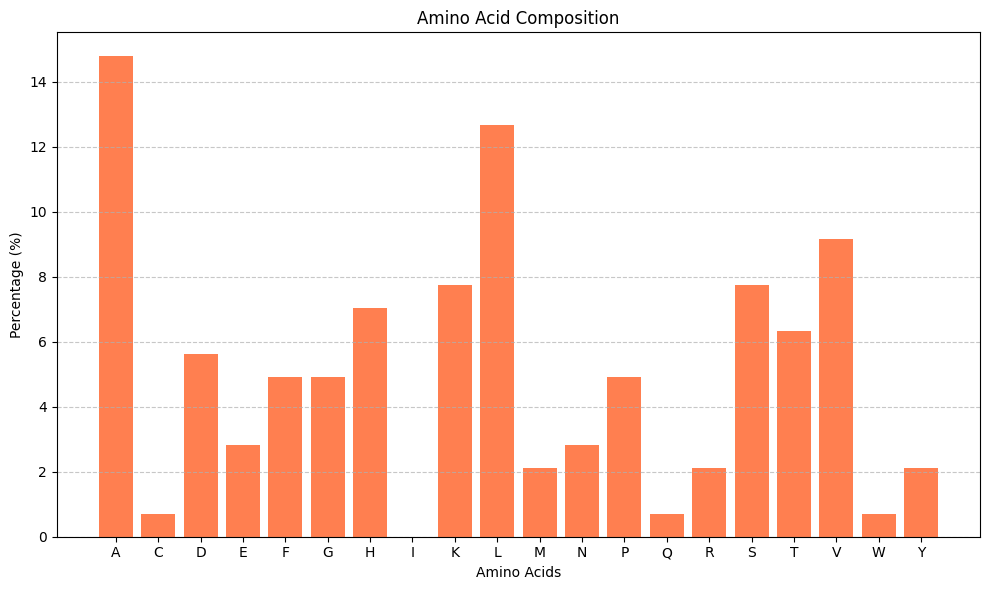

In [10]:
from matplotlib.pyplot import ylabel


aa_composition =  analyzed_seq.get_amino_acids_percent()
# amino acide percentages
aa_composition_percent = {k:v * 100 for k, v in aa_composition.items()}

#plot
plt.figure(figsize=(10, 6))
plt.bar(aa_composition_percent.keys(), aa_composition_percent.values(), color='coral')
plt.xlabel('Amino Acids')
plt.ylabel('Percentage (%)')
plt.title('Amino Acid Composition')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("amino_acid_composition.png")
plt.show()

BATCH ANALYSIS:
The batch analysis is a type of analysis that is performed on a single batch of data. It is used to analyze the data in a batch and to identify any patterns or trends that may be present.

In [13]:
from Bio import SeqIO


for record in SeqIO.parse("hemo.fasta", "fasta"):
    print(f"Calculating melting temperature for {record.id}...")
    print(f"Analyzing: {record.id}")
    
    # Create ProteinAnalysis object for each sequence
    sequence = str(record.seq)
    analysed_seq = ProteinAnalysis(sequence)
    
    print("MW:", analysed_seq.molecular_weight())
    print("pI:", analysed_seq.isoelectric_point())
    print("---")

Calculating melting temperature for sp|P69905|HBA_HUMAN...
Analyzing: sp|P69905|HBA_HUMAN
MW: 15257.359099999983
pI: 8.716915321350097
---


Sequence Comparison - Simple Pairwise Allignment

In [15]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
seq1 = "MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF"
seq2 = "MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFG"

alignments = pairwise2.align.globalxx(seq1, seq2) 

#show top alignment
for alignment in alignments[:1]:
    print(format_alignment(*alignment, full_sequences=True))

MV-LSPADKTNV---K-A--A-WGKVGAHAG---EY-GA-EALE-RMFLSF----PTTK-TY--FPHF----
|| |     |     | |  | ||||        |  |  |||  |  |      |    |   |  |    
MVHL-----T--PEEKSAVTALWGKV-----NVDE-VG-GEAL-GR--L--LVVYP---WT-QRF--FESFG
  Score=22



Web Tool Integration- UniProt or NCBI Fetching


In [16]:
from bioservices import UniProt
from Bio.SeqUtils.ProtParam import ProteinAnalysis


Creating directory C:\Users\gurur\AppData\Local\bioservices\bioservices 


In [19]:
from bioservices import UniProt

# Your UniProt ID here
uniprot_id = "P69905"  # Example: Hemoglobin subunit alpha (HBA_HUMAN)

u = UniProt()

# Fetch FASTA format sequence from UniProt
fasta = u.retrieve(uniprot_id, frmt="fasta")

# Check if response is valid FASTA
if isinstance(fasta, str) and fasta.startswith(">"):
    print(f"\nFetched FASTA:\n{fasta[:200]}...\n")

    # Extract sequence from FASTA
    lines = fasta.strip().split("\n")
    sequence = "".join(lines[1:])  # Skip header
    print(f"Extracted sequence (first 100 aa): {sequence[:100]}...")

else:
    print(f"⚠️ Failed to fetch FASTA for UniProt ID {uniprot_id}. Response: {fasta}")



Fetched FASTA:
>sp|P69905|HBA_HUMAN Hemoglobin subunit alpha OS=Homo sapiens OX=9606 GN=HBA1 PE=1 SV=2
MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHG
KKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLA...

Extracted sequence (first 100 aa): MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFK...


In [21]:
from Bio import ExPASy, SwissProt

# Connect to ExPASy and fetch the SwissProt record
accession_id = "P69905"
handle = ExPASy.get_sprot_raw(accession_id)
record = SwissProt.read(handle)

# Print metadata (optional)
print(f"Entry Name: {record.entry_name}")
print(f"Organism: {record.organism}")
print(f"Protein Name: {record.description}")

# Extract the first 100 amino acids of the sequence
sequence = record.sequence
first_100 = sequence[:100]

print("\nExtracted sequence (first 100 aa):")
print(first_100)


Entry Name: HBA_HUMAN
Organism: Homo sapiens (Human).
Protein Name: RecName: Full=Hemoglobin subunit alpha; AltName: Full=Alpha-globin; AltName: Full=Hemoglobin alpha chain; Contains: RecName: Full=Hemopressin {ECO:0000303|PubMed:18077343};

Extracted sequence (first 100 aa):
MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFK
